In [ ]:
#Primero, realizamos la importacion de las librerias que vamos a utilizar para realizar el analisis y tratar los datos

In [ ]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))
#Con un breve vistazo a nuestros datos, vemos que tenemos una serie de variables de negocio, que a priori,
#usando la logica como punto de partida funcional, esperamos que expliquen la variabilidad del CHURN.

In [ ]:
data.shape
#A priori, contamos con 7043 registros (poco si hablamos de Big Data), y 21 variables
#procedemos a hacer un analisis exploratorio a nivel general para ver que tenemos

In [ ]:
data.info()
#contamos con solo 3 variables cuantitativas, vamos a aplicarle una estadistica descriptiva para ver 
#como se distribuyen las variables y si son discretas o continuas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()
# el caso de la primera de ellas SeniorCitizen, podria tratarse de una variable dummy 0/1 por lo que, revisamos
#en el caso de las otras variables, a priori vemos que tanto los meses de permanencia, como los cargas mensuales
#tienen una alta desviacion.

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.SeniorCitizen.unique()
#confirmado, se trata de una variable categorica

array([0, 1])

In [ ]:
#adicionalmente, parece ser que la variable TotalCharges, no esta definida como numerica, por lo que el describe()
#no la detecta automaticamente, sera interesante procesarla para darle un formato adecuado
data.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
#antes de comenzar un analisis exploratorio, vamos a realizar un analisis de calidad del dato (DQ)

In [ ]:
#1)valores nulos/vacios
#vemos que el dataset se encuentra muy limpio, bien porque el equipo de BI hace bien su trabajo y existen filtros de
# "proteccion" para que en caso de que la informacion no tenga la completitud suficiente, se descarte antes de llegar a
# capas de explotacion (obviamos que se trata de un dataset preparado para análisis)
data.isnull().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#2) Análisis de coherencia de la información, vemos que lo que recibimos es consistente
#Sólo tenemos dos generos
#Se puede ser partner o no
#En los casos de servicios vinculados a tener internet (como seguridad online, TV en streaming etc) tenemos una categoria
#para descartar los clientes que no tienen porque no han contratado internet, lo cual es interesante para analizar ese segmento
# de mercado
data.apply(set)

customerID          {4672-FOTSD, 0613-WUXUM, 1247-QBVSH, 6776-TLWO...
gender                                                 {Female, Male}
SeniorCitizen                                                  {0, 1}
Partner                                                     {Yes, No}
Dependents                                                  {Yes, No}
tenure              {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
PhoneService                                                {Yes, No}
MultipleLines                             {Yes, No, No phone service}
InternetService                                {No, Fiber optic, DSL}
OnlineSecurity                         {Yes, No internet service, No}
OnlineBackup                           {Yes, No internet service, No}
DeviceProtection                       {Yes, No internet service, No}
TechSupport                            {Yes, No internet service, No}
StreamingTV                            {Yes, No internet service, No}
StreamingMovies     

In [ ]:
#3) analisis de distribución para poder conocer los posibles outliers y entender como se distribuyen algunas variables,
# de cara a un análisis mas avanzado
data.TotalCharges.dtype
data["TotalCharges"] = data["TotalCharges"].astype(float, errors="raise")
#cuando tratamos de convertir la variable TotalCharges en int para poder trabajar con ella nos da problemas, vemos que se ha escapado a la función isnull

ValueError: ignored

In [ ]:
#esto se debe a que hay un espacios que impiden que se haga correctamente la conversion
#los espacios se encuentran en las siguientes lineas

data.TotalCharges[map(lambda x: x.isspace(), data['TotalCharges'])]


488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [ ]:
#realizamos un pequeño check, y efectivamente tenemos valores vacios que habian pasado desapercibidos a la funcion isnull
# al tratarse de espacios y ser pocos, podriamos imputarlos pero optamos por eliminarlos
data.loc[488,]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
# dropeamos los rows que tienen esos valores vacios, podriamos haberlo hecho de manera mas elegante con un for, pero por
# el escaso impacto, optamos por quitarlos "manualmente"
data = data.drop([488,753,936,1082,1340,3331,3826,4380,5218,6670,6754], 0)

In [ ]:
#comprobamos que ya no hay espacios
data.TotalCharges[data.TotalCharges.str.isspace()].to_list()

[]

In [ ]:
# ya podemos transformar TotalCharges en una variable numerica con:
data["TotalCharges"] = data["TotalCharges"].astype(float, errors="raise")
data["TotalCharges"].dtype

dtype('float64')

In [ ]:
resumen= (data[[i for i in data.columns]].
           describe().transpose().reset_index())
resumen = resumen.rename(columns = {"index" : "feature"})
resumen

,feature,count,mean,std,min,25%,50%,75%,max
0,SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
1,tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
2,MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
3,TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


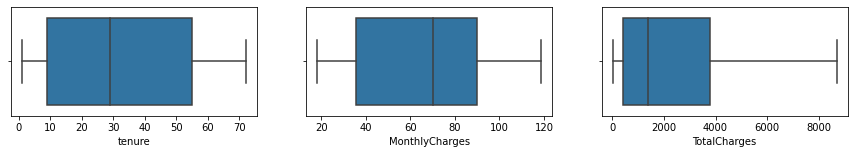

In [ ]:
# analisis de distribución de para nuestras variables numericas
fig, axes = plt.subplots(1, 3, figsize=(15, 2), sharey=True)


sns.boxplot(ax=axes[0], x=data["tenure"])
sns.boxplot(ax=axes[1], x=data["MonthlyCharges"])
sns.boxplot(ax=axes[2], x=data["TotalCharges"])
#en este caso podriamos estar ante ciertos outliers en el caso de los Cargos totales, podriamos tratar de hacer un análisis
#de correlación para comprobar si los usuarios con mayor tiempo de permanencia, tienen cargos totales lo cual
#desde el punto de vista de negocio es normal, no habria que tratarlos, pero no vamos a profundizar tanto

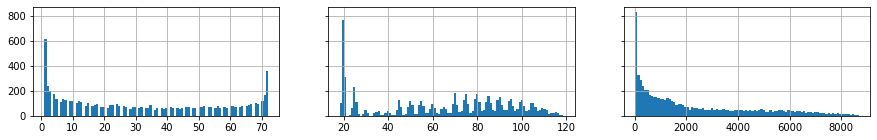

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2), sharey=True)
data["tenure"].hist(ax=axes[0],bins=100)
data["MonthlyCharges"].hist(ax=axes[1],bins=100)
data["TotalCharges"].hist(ax=axes[2],bins=100)


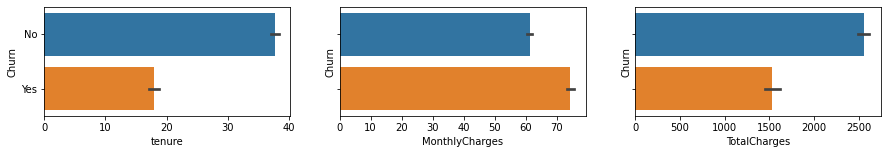

In [ ]:
#Asi mismo ponemos en relacion nuestras variables numericas con el Churn, para ir viendo que variables son útiles,
# no obstante esto lo trataremos en profundidad con una matriz de correlación, o podriamos directamente utilizar una
# optimización bayesiana o un gridsearch para seleccionar las mejores variables
fig, axes = plt.subplots(1, 3, figsize=(15, 2), sharey=True)
sns.barplot(ax=axes[0], x=data["tenure"], y=data["Churn"])
sns.barplot(ax=axes[1], x=data["MonthlyCharges"], y=data["Churn"])
sns.barplot(ax=axes[2], x=data["TotalCharges"], y=data["Churn"])

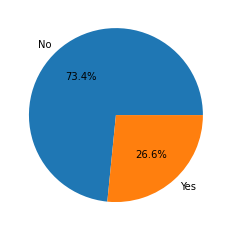

In [ ]:
y=np.array(data.Churn.value_counts())
plt.pie(y, labels=data["Churn"].value_counts().keys().tolist(), autopct='%1.1f%%')
plt.show()
# vemos que unicamente el 26% de los clientes han dado de baja el servicio, quizas tendriamos un problema de inbalanceo de
# los datos, de momento no lo vamos a hacer, veremos como impacta al entrenar el modelo

In [ ]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# PREPROCESAMIENTO DE LAS VARIABLES ANTES DE MODELAR
# primero vamos a crear variables binarias 1 o 0 para las respuestas si, no

In [ ]:
convertir = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for i in convertir:
  data[i].replace(to_replace="Yes", value=1, inplace=True)
  data[i].replace(to_replace="No", value=0, inplace=True)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
data.describe()
# Como nuestros datos cuantitativos no tienen una diferencia de escala muy sustancial (de momento no vamos a estandarizar)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


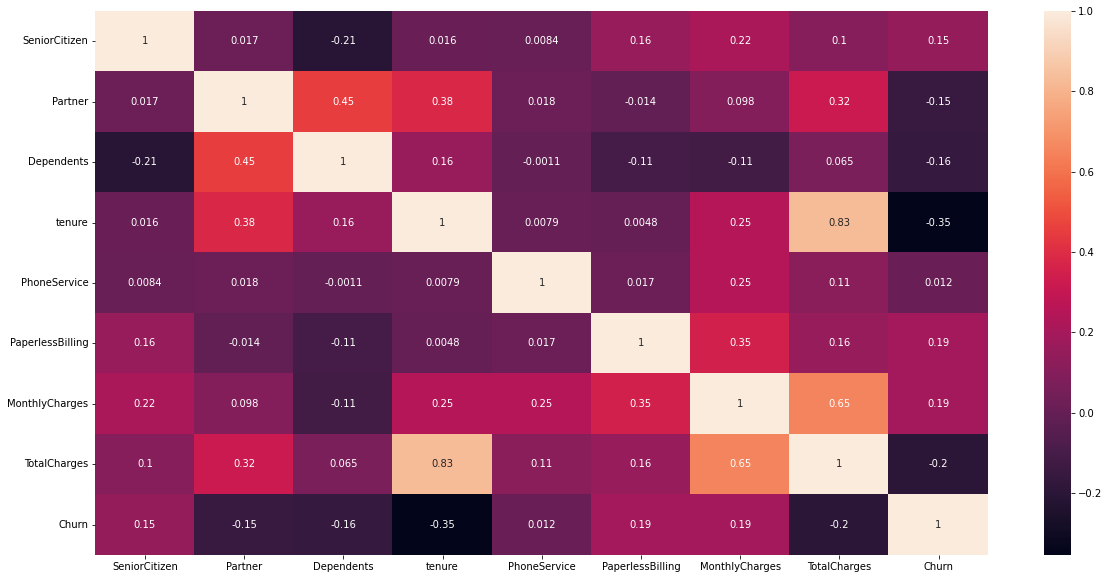

In [ ]:
# Una vez que tenemos los datos preparados, procedemos a un análisis previo de correlación entre variables, para ver
# si a priori, tenemos variables correlacionadas entre si
fig=plt.figure(figsize=(20,10))
correlation= data.corr()
dataplot=sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot=True)


In [ ]:
# creamos una copia del dataset, eliminamos la columna de ID de usuario (no tiene valor predictivo, y ademas aumenta la complejidad del dataset cuando usamos get_dummies)
data2 = data.copy()
del data2["customerID"]
data2.shape


(7032, 20)

In [ ]:
data_dummies = pd.get_dummies(data2)
data_dummies.fillna(value=0, inplace=True)
data_dummies.shape



(7032, 42)

In [ ]:
# quitamos la variable objetivo antes de entrenar al modelo
target=data_dummies["Churn"]
del data_dummies["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
# Como primera propuesta del modelo, vamos a utilizar arboles de decision, ya que tienen una alta interpretabilidad, 
# lo cual nos va a venir muy bien para realizar recomendaciones a cliente
from sklearn.tree import DecisionTreeClassifier
# creamos una profunidad maxima de arbol de 4 para que no se vuelva muy complejo y poder visualizarlo
classifier = DecisionTreeClassifier(max_depth=4, criterion="entropy")

In [ ]:

classifier

# hacemos una revision de los hiperparametros del modelo, vamos a probar como criterio de division entre clases, gini, posteriormente usaremos entropy e incluso dado que estamos en colab
# usando gpus de google, podriamos probar una gridsearch con todos los hiperparametros para conseguir los mejores resultados


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# utilizamos la tipica division 70% train, 30% test
x_train, x_test, y_train, y_test = train_test_split(data_dummies, target, test_size=0.4, random_state=0)
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_test)
score = classifier.score(x_test, y_test)
score

0.7977248489157484

In [ ]:
classe_name=classifier.classes_

array([0, 1])

In [ ]:
importancia_variables = pd.DataFrame()
importancia_variables["importancia"] = classifier.feature_importances_
importancia_variables.set_index(keys=data_dummies.columns).sort_values(by="importancia", ascending=False)
# a priori, y viendo la importancia de las variables, el tener un contrato mes a mes o no, es una de las variables de mayor importancia, pero vamos a usar una matriz de confusión
# para verlo en detalle primero preparamos una funcion reciclable (ya que cambiaremos parámetros mas adelante), para ver los resultados del árbol



,importancia
Contract_Month-to-month,0.560130
tenure,0.152429
InternetService_Fiber optic,0.104751
MonthlyCharges,0.085017
TotalCharges,0.042199
TechSupport_No,0.019133
Contract_One year,0.016029
gender_Female,0.010208
PaperlessBilling,0.006566
PaymentMethod_Credit card (automatic),0.003538


In [ ]:
import graphviz
from google.colab import files


In [ ]:
# Exportamos el árbol para tenerlo guardado de cara a poder ver como toma las decisiones de split en cada clase, y poder hacer recomendaciones a negocio
data_graph = tree.export_graphviz(classifier)
import pylab
dot_data = tree.export_graphviz(classifier, 
                  feature_names=cols,  
                  class_names=["Churn_no", "Churn_si"],  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None)
graph = graphviz.Source(dot_data)
filename = graph.render(filename='tree', format="pdf")
files.download(filename)









<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# A continuación vamos a evaluar mas parametros de este arbol, tales como la sensibilidad, especifidad, y el f1_score, que agrupa ambos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import itertools


In [ ]:
cm = confusion_matrix(y_test, prediction, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Churn_no", "Churn_si"])

<Figure size 1440x720 with 0 Axes>

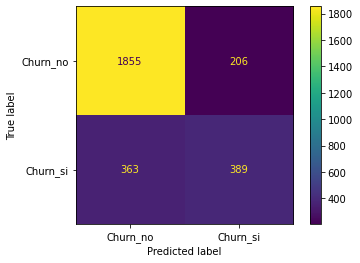

In [ ]:
fig=plt.figure(figsize=(20,10))
disp.plot(values_format='')
plt.show()

In [ ]:
print(classification_report(y_test, prediction, target_names=["Churn_no", "Churn_si"]))

# Como se trata de un modelo de classificacion, no tenemos que tener en cuenta unicamente el bias-variance tradeoff, tambien hay que tener en cuenta el precission-recall

# precision(TP/TP+FP)= proporcion de  positivos verdaderos, entre todos los positivos (1855+363)? 
#Como de preciso es el modelo?Es decir, que capacidad tiene de detectar la classe no Churn? 84% para no churn, 65% para si churn

# recall(TP/TP+FN)= medimos como de preciso es el modelo en identificar correctamente los casos true positive (Churn No)= 90%
#accuracy = Proporcion de predicciones correctas, respecto del total de predicciones-> como tenemos classes desbalanceadas, no interesa
# f1= Combinamos ambas dos

              precision    recall  f1-score   support

    Churn_no       0.84      0.90      0.87      2061
    Churn_si       0.65      0.52      0.58       752

    accuracy                           0.80      2813
   macro avg       0.75      0.71      0.72      2813
weighted avg       0.79      0.80      0.79      2813



In [ ]:
# En conclusión, nuestro modelo es bastante bueno identificando los casos que no van a hacer Churn, debido a las clases desbalanceadas. Dado el alcance del ejercicio realizado
# no implica problema, ya que el objetivo sobre todo, era identificar que hace que los clientes se queden, para poder inferirlo a los clientes que se van.
# adicionalmente, el modelo podria usarse como servicio en el caso de que se ponga en producción para automaticamente taggear a los clientes para realizarles cierto tratamiento especial